**BTC Price Prediction**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
BTC =pd.read_csv('BTC-USD Training Data.csv')                     #training data
BTCT =pd.read_csv('BTC-USD OTT.csv')                              #test data

In [3]:
data_training = BTC.copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400


In [4]:
data_test = BTCT.copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
5,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
6,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
7,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
8,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
9,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,430.721008,436.246002,427.515015,434.334015,36278900
1,434.622009,436.062012,431.869995,433.437988,30096600
2,433.578003,433.743011,424.705994,430.010986,39633800
3,430.061005,434.516998,429.084015,433.091003,38477500
4,433.069000,434.182007,429.675995,431.959991,34522600


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[9.77127943e-04, 8.95947982e-04, 1.09956307e-03, 1.04167291e-03,
        2.21260405e-05],
       [1.03519181e-03, 8.93258647e-04, 1.16552048e-03, 1.02833967e-03,
        4.50961014e-06],
       [1.01965246e-03, 8.59362396e-04, 1.05701964e-03, 9.77344516e-04,
        3.16858099e-05],
       ...,
       [6.86548559e-01, 6.94368786e-01, 6.92221299e-01, 6.96607954e-01,
        7.59617613e-02],
       [6.96651544e-01, 7.03030122e-01, 6.88580988e-01, 6.83637012e-01,
        1.05276454e-01],
       [6.83886354e-01, 6.93599180e-01, 6.95677027e-01, 7.04177427e-01,
        6.99669261e-02]])

In [7]:
print(training_data)

[[9.77127943e-04 8.95947982e-04 1.09956307e-03 1.04167291e-03
  2.21260405e-05]
 [1.03519181e-03 8.93258647e-04 1.16552048e-03 1.02833967e-03
  4.50961014e-06]
 [1.01965246e-03 8.59362396e-04 1.05701964e-03 9.77344516e-04
  3.16858099e-05]
 ...
 [6.86548559e-01 6.94368786e-01 6.92221299e-01 6.96607954e-01
  7.59617613e-02]
 [6.96651544e-01 7.03030122e-01 6.88580988e-01 6.83637012e-01
  1.05276454e-01]
 [6.83886354e-01 6.93599180e-01 6.95677027e-01 7.04177427e-01
  6.99669261e-02]]


In [8]:
X_train = []
Y_train = []

In [9]:
training_data.shape[0]

2193

In [10]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [11]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [12]:
X_train.shape

(2133, 60, 5)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [18]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
43/43 [==============================] - 23s 316ms/step - loss: 0.0189
Epoch 2/20
43/43 [==============================] - 12s 268ms/step - loss: 0.0060
Epoch 3/20
43/43 [==============================] - 12s 269ms/step - loss: 0.0041
Epoch 4/20
43/43 [==============================] - 11s 265ms/step - loss: 0.0041
Epoch 5/20
43/43 [==============================] - 12s 272ms/step - loss: 0.0042
Epoch 6/20
43/43 [==============================] - 12s 285ms/step - loss: 0.0041
Epoch 7/20
43/43 [==============================] - 12s 271ms/step - loss: 0.0042
Epoch 8/20
43/43 [==============================] - 12s 275ms/step - loss: 0.0035
Epoch 9/20
43/43 [==============================] - 12s 288ms/step - loss: 0.0038
Epoch 10/20
43/43 [==============================] - 12s 286ms/step - loss: 0.0037
Epoch 11/20
43/43 [==============================] - 11s 265ms/step - loss: 0.0040
Epoch 12/20
43/43 [==============================] - 12s 275ms/step - loss: 0.0033
Epoch 13/20
4

In [19]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_69144\1802083127.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= past_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,63254.335938,63516.937500,61184.238281,62970.046875,36124731509
1,62941.804688,63123.289063,60799.664063,61452.230469,32615846901
2,61460.078125,62541.468750,60844.609375,61125.675781,30605102446
3,61068.875000,61590.683594,60163.781250,61527.480469,29094934221
4,61554.921875,63326.988281,61432.488281,63326.988281,24726754302


In [20]:
inputs = scaler.transform(df)
inputs

array([[0.93606579, 0.92293046, 0.92127747, 0.93159806, 0.10285598],
       [0.93141396, 0.9171766 , 0.91545298, 0.90901234, 0.09285743],
       [0.90935943, 0.90867228, 0.91613369, 0.90415308, 0.08712782],
       [0.90353662, 0.89477489, 0.90582236, 0.91013209, 0.08282461],
       [0.91077111, 0.92015402, 0.92503729, 0.93690949, 0.0703775 ],
       [0.93740137, 0.98368942, 0.95398868, 1.        , 0.11710595],
       [1.        , 0.99621004, 1.        , 0.99114616, 0.12061762],
       [0.991123  , 1.        , 0.95192963, 0.9617336 , 0.13877698],
       [0.96173466, 0.95307133, 0.96665653, 0.96105997, 0.10216042],
       [0.9600243 , 0.95134365, 0.93868964, 0.94924464, 0.10274246],
       [0.94951804, 0.94337546, 0.95337784, 0.95391093, 0.0867549 ],
       [0.95394241, 0.95184593, 0.95858894, 0.96875134, 0.07150402],
       [0.96980791, 0.9633404 , 0.9570795 , 0.94034512, 0.08699578],
       [0.94301469, 0.92591605, 0.88844397, 0.88980198, 0.13340143],
       [0.88970528, 0.88356276, 0.

In [21]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [22]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((35, 60, 5), (35,))

In [23]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.6656651 ],
        [0.6634403 ],
        [0.6605745 ],
        [0.6573576 ],
        [0.6539541 ],
        [0.65017194],
        [0.6457367 ],
        [0.64038515],
        [0.63398665],
        [0.62679404],
        [0.6191468 ],
        [0.611578  ],
        [0.6047635 ],
        [0.59912866],
        [0.594801  ],
        [0.5918094 ],
        [0.5900584 ],
        [0.58926946],
        [0.58910125],
        [0.58922255],
        [0.5893084 ],
        [0.58856815],
        [0.58610356],
        [0.58158714],
        [0.57518333],
        [0.56747603],
        [0.5592256 ],
        [0.55107135],
        [0.54358834],
        [0.5372661 ],
        [0.53237385],
        [0.52899486],
        [0.52714103],
        [0.5265246 ],
        [0.5266947 ]], dtype=float32),
 array([0.68388635, 0.7042657 , 0.69924398, 0.68607592, 0.67774825,
        0.64301044, 0.63687896, 0.61318151, 0.61576039, 0.61837266,
        0.61702231, 0.63075568, 0.64868481, 0.62862262, 0.63610986,
        0

In [24]:
scaler.scale_


array([1.48843498e-05, 1.46167471e-05, 1.51452853e-05, 1.48803994e-05,
       2.84949459e-12])

In [25]:
scale = 1/1.48843498e-05
scale

67184.66130109358

In [26]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [27]:
Y_pred

array([[44722.484],
       [44573.01 ],
       [44380.477],
       [44164.348],
       [43935.688],
       [43681.582],
       [43383.6  ],
       [43024.062],
       [42594.18 ],
       [42110.945],
       [41597.17 ],
       [41088.66 ],
       [40630.832],
       [40252.258],
       [39961.508],
       [39760.516],
       [39642.875],
       [39589.87 ],
       [39578.57 ],
       [39586.72 ],
       [39592.484],
       [39542.754],
       [39377.17 ],
       [39073.74 ],
       [38643.5  ],
       [38125.688],
       [37571.387],
       [37023.543],
       [36520.8  ],
       [36096.04 ],
       [35767.36 ],
       [35540.344],
       [35415.793],
       [35374.38 ],
       [35385.81 ]], dtype=float32)

In [28]:
Y_test

array([45946.67304409, 47315.85272954, 46978.46991792, 46093.77851292,
       45534.28632555, 43200.43867219, 42788.49726666, 41196.39179946,
       41369.65351826, 41545.15742406, 41454.43476816, 42377.10664212,
       43581.66914076, 42233.79804828, 42736.82539172, 42806.96601664,
       42753.0480477 , 41885.00117368, 42008.96601754, 41378.95429925,
       40334.53242543, 36106.51680521, 34682.28633782, 35910.66133643,
       36289.731649  , 36585.44258567, 36476.80586679, 36763.37227346,
       37415.64180373, 37786.84492831, 37555.20820957, 38116.69258394,
       38378.64180264, 36579.73164867, 36868.98555434])

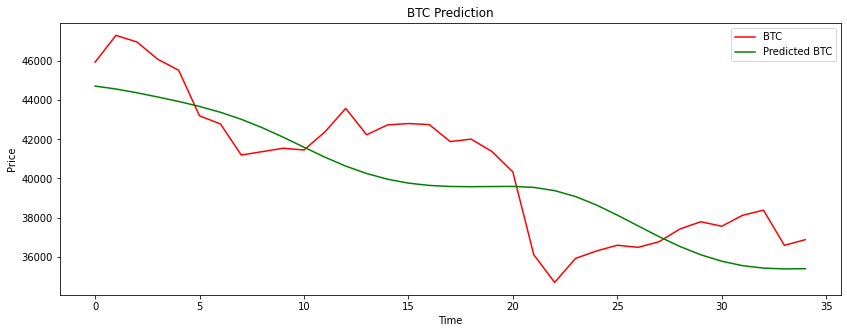

In [29]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'BTC')
plt.plot(Y_pred, color = 'green', label = 'Predicted BTC')
plt.title('BTC Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()